## 2.1 분류(Clsassification)와 회귀(Regression)  
1. 분류  
a. 분류는 미리 정의된 가능성 있는 여러 클래스 레이블 중 하나를 예측  
b. 두 개의 클래스로 분류하는 건 이진 분류(binary classification), 셋 이상의 클래스로 분류하는 건 다중 분류(multiclass classification) 이라 함  

2. 회귀  
a. 연속적인 숫자(실수)를 예측  
b. 사람의 교육 수준, 나이, 주거지를 바탕으로 연간 소득을 예측 또는 특정 농산물의 올 해 수확량 예측  
c. 분류문제와 달리 회귀문제에서는 출력값의 작은 차이는 문제가 되지 않음

## 2.2 일반화, 과대적합, 과소적합  
- 지도학습에서 훈련 데이터로 학습한 모델이 훈련 데이터와 특성이 같다면 처음 보는 새로운 데이터가 주어져도 정확히 예측할 수 있음  
- 모델이 처음 보는 데이터에 대해 정확하게 예측할 수 있다면 이를 훈련 세트에서 테스트 세트로 일반화(generalization)되었다고 함 - 학습이 잘 되었다  
- 보유하고 있는 모든 정보를 이용해 만든 복잡한 모델은 훈련 세트에만 최적화되어 새로운 데이터에 일반화 되기 어렵다. 이를 과대적합(overfitting)이라 함 - 너무 분류함  
(45세 이상이고, 자녀가 셋 미만이며 이혼하지 않은 고객은 요트를 살 것이다.)  
- 모델이 너무 간단하면 데이터의 다양성을 잡아내지 못하고 정확도도 떨어짐, 이를 과소적합(underfitting)이라 함 (집이 있는 사람은 모두 요트를 사려고 함) - 분류 잘 못함  
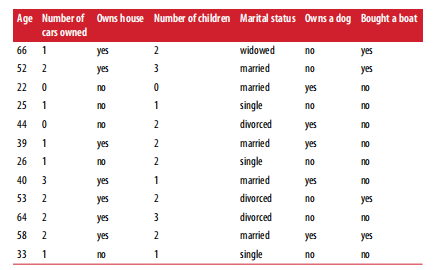   
    
    
- 모델이란, 수학적 알고리즘의 표현식   

- 다음 그림과 같이 일반화 성능이 최대가 되는 최적점에 있는 모델을 찾아야 함  
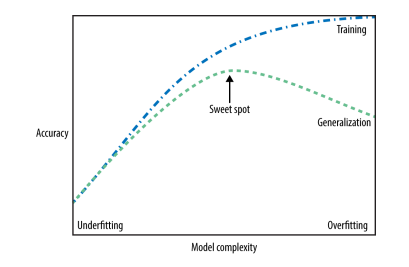
1. 데이터 세트에 다양한 데이터 포인트가 많을수록(feature의 수가 많을수록) 과대적합 없이 더 복잡한 모델을 구축할 수 있음

- test용의 결과의 정확도가 떨어질 때   
   * 원인분석   
     1. train 정확도 떨어짐 - underfitting
     2. train 정확도 높음 - overfitting

## 2.3 지도 학습 알고리즘  
1. 예제에 사용할 데이터셋  
a. forge 데이터셋은 인위적으로 만든 이진 분류 데이터셋 feature 2개, target 1개  
- x축은 첫 번째 특성, y축은 두 번째 특성으로 그래프 작성

In [3]:
import mglearn
import matplotlib.pyplot as plt

X, y = mglearn.datasets.make_forge()
print(X)
print(y)

[[ 9.96346605  4.59676542]
 [11.0329545  -0.16816717]
 [11.54155807  5.21116083]
 [ 8.69289001  1.54322016]
 [ 8.1062269   4.28695977]
 [ 8.30988863  4.80623966]
 [11.93027136  4.64866327]
 [ 9.67284681 -0.20283165]
 [ 8.34810316  5.13415623]
 [ 8.67494727  4.47573059]
 [ 9.17748385  5.09283177]
 [10.24028948  2.45544401]
 [ 8.68937095  1.48709629]
 [ 8.92229526 -0.63993225]
 [ 9.49123469  4.33224792]
 [ 9.25694192  5.13284858]
 [ 7.99815287  4.8525051 ]
 [ 8.18378052  1.29564214]
 [ 8.7337095   2.49162431]
 [ 9.32298256  5.09840649]
 [10.06393839  0.99078055]
 [ 9.50048972 -0.26430318]
 [ 8.34468785  1.63824349]
 [ 9.50169345  1.93824624]
 [ 9.15072323  5.49832246]
 [11.563957    1.3389402 ]]
[1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0]


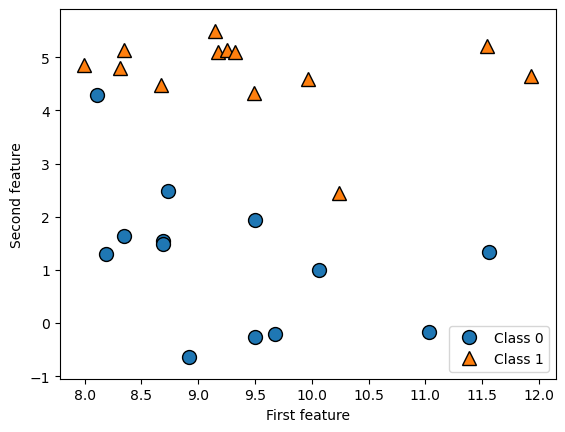

X.shape: (26, 2)


In [4]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()
print("X.shape:", X.shape)

sample 26  / feature 2

b. 회귀 알고리즘에는 인위적으로 만든 wave 데이터셋을 사용  
- 입력 특성 한 개와 target 변수를 가짐  
- 특성을 x축, target을 y축

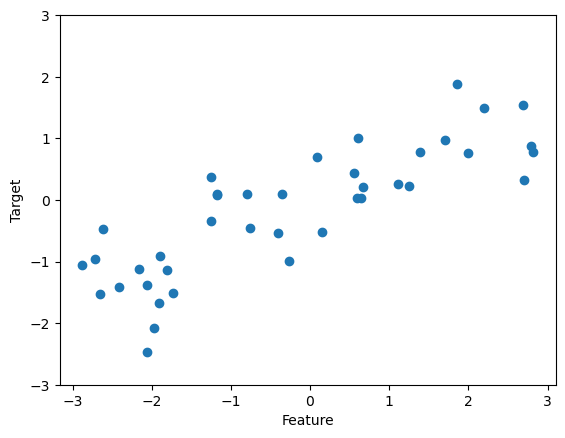

In [6]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")
plt.show()

c. scikit-learn 에 들어 있는 실제 데이터셋 사용  
- 유방암 종양의 임상 데이터를 기록해 놓은 위스콘신 유방암 데이터셋(cancer)  
- 각 종양은 양성(benign)과 악성(malignant)로 레이블 되어 있음 - target 2개  
- 조직 데이터를 기반으로 종양이 악성인지를 예측하도록 학습하는 것이 과제

In [7]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(cancer.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [8]:
print(cancer.data.shape)

(569, 30)


In [9]:
print(cancer.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [10]:
alist = ['a1', 'a2', 'a3']
blist = ['b1', 'b2', 'b3', 'b4']
for a, b in zip(alist, blist):
    print(a, b)

a1 b1
a2 b2
a3 b3


- zip 함수 확인   
같은 index끼리 묶어줌

In [11]:
print(cancer.target_names)

['malignant' 'benign']


In [16]:
import numpy as np
print("클래스별 샘플 수:\n{}".format({n:v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

클래스별 샘플 수:
{'malignant': 212, 'benign': 357}


In [14]:
print(cancer.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


d. 또 하나의 실제 데이터셋  
- 보스턴 주택가격 데이터 셋  
- 범죄율, 찰스강 인접도, 고속도록 접근성 등의 정보를 이용해 1970년대 보스턴 주변의 주택 평균 가격을 예측  
- 이 데이터 셋에는 샘플 506개 feature 13개

In [17]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape)

(506, 13)


C:\Users\BIT\miniconda3\envs\ml-env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing

In [19]:
X, y = mglearn.datasets.load_extended_boston()
print(X.shape)

(506, 104)


C:\Users\BIT\miniconda3\envs\ml-env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing

## 2. k-NN
a. k-Nearest Neighbors  
- k-NN은 가장 가까운 훈련 데이터 샘플을 최근접 이웃으로 찾아 예측에 사용  

C:\Users\BIT\miniconda3\envs\ml-env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


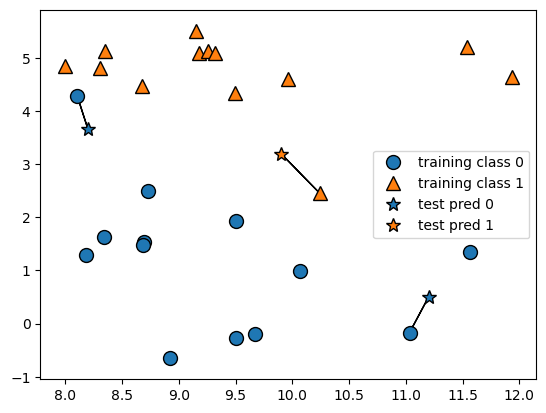

In [20]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

C:\Users\BIT\miniconda3\envs\ml-env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


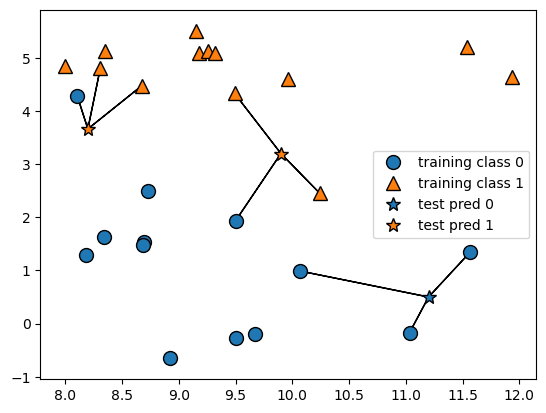

In [21]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [26]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = \
train_test_split(X, y, random_state=0)

C:\Users\BIT\miniconda3\envs\ml-env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [27]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [28]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [29]:
print(clf.predict(X_test))

[1 0 1 0 1 0 0]


In [30]:
print('Test Accuracy: {:.2f}'.format(clf.score(X_test, y_test)))

Test Accuracy: 0.86
